# Adult Dataset

About the dataset 

1.Age: Describes the age of individuals. Continuous.

2.Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3.fnlwgt: Continuous.

4.education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5.education-num: Number of years spent in education. Continuous.

6.marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7.occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8.relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9.race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10.sex: Female, Male.

11.capital-gain: Continuous.

12.capital-loss: Continuous.

13.hours-per-week: Continuous.

14.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15.salary: >50K,<=50K


## Importing Libraries

In [226]:
import pandas as pd
import numpy as np
import math 
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Data Loading

In [227]:
df=pd.read_csv('adult.csv')
df

,age,workclass,final weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [228]:
df.size

488415

## Missing Value Handling

In [229]:
 df.isnull().sum()

age               0
workclass         0
final weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

From the above we can see that there are no missing values but in this dataset there are some values as '?' , these values must be handled.For Categorical values there are 3 columns which has high numbers of '?' values.

In [230]:
empty_val={}
columns=['age','final weight','education-num','capital-gain','capital-loss','workclass','occupation','native-country']
for col in columns:
    if (df[col] == " ?").sum():
        empty_val[col]=(df[col] == " ?").sum()
    else:
        empty_val[col]=0
empty_val   

{'age': 0,
 'final weight': 0,
 'education-num': 0,
 'capital-gain': 0,
 'capital-loss': 0,
 'workclass': 1836,
 'occupation': 1843,
 'native-country': 583}

to remove them we relace it with the most occuring value from each column

In [231]:
df['workclass'].replace({' ?': None},inplace =True)
df['occupation'].replace({' ?': None},inplace =True)
df['native-country'].replace({' ?': None},inplace =True)
                             
mod_val = df['workclass'].mode()[0]                             
df['workclass'].fillna(mod_val,inplace=True)
mod_val = df['occupation'].mode()[0]   
df['occupation'].fillna(mod_val,inplace=True)
mod_val = df['native-country'].mode()[0]   
df['native-country'].fillna(mod_val,inplace=True)

In [232]:
#function to plot data
columns=['age','final weight','education-num','capital-gain','capital-loss']
def plot_data(columns, dataframe):
    for col in columns:
        palette = sns.color_palette("bright")
        sns.set()
        plt.subplot(2,1,2)
        sns.histplot(data=dataframe, x=col, kde=True,alpha=0.5)
        plt.show()

## Outlier Detection

For Outlier Detection we will be applying 2 techiques to find and remove to extreme values from the dataset. 

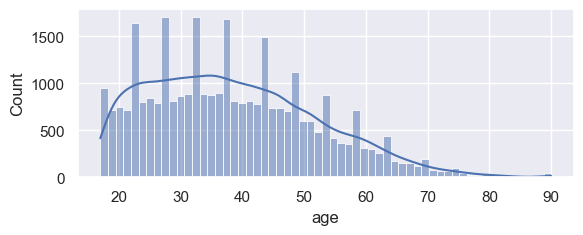

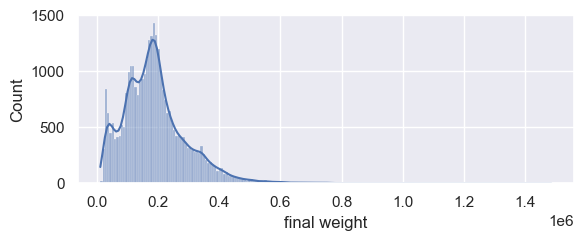

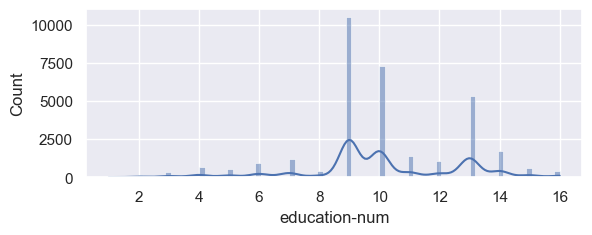

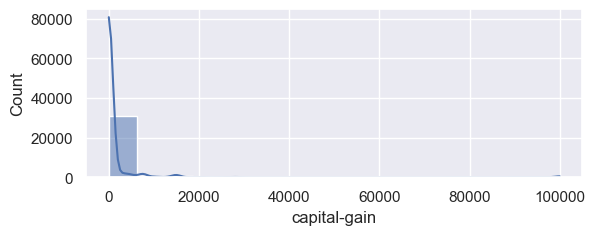

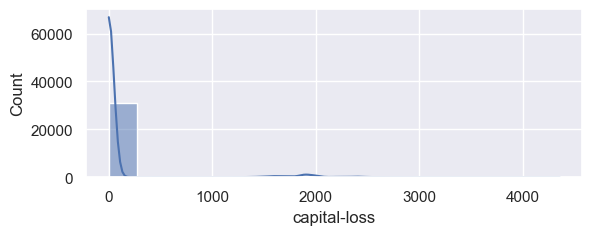

In [233]:
plot_data(columns,df)  

## Applying Mean SDV For Removing Outliers

The mean and standard deviation values for removing outliers are dependent on the data set that is being used. Generally, outliers are considered to be data points that lie more than three standard deviations away from the mean. Therefore, the mean and standard deviation values can be used to identify and remove outliers from a data set.In our example we will be applying 2 standard deviation to remove the outliers.

In [234]:
# making a copy of dataset to demonstrate Mean SDV
df1 = df.copy(deep=True)

# Function to calculate mean
def calculate_mean(list):
    n = len(list)
    t = sum(list)
    mean = n / t
    return mean
    
# Function to standard deviation
def calculate_stdv(list):
    n = len(list)
    mean = calculate_mean(list)
    variance = sum((x - mean)**2 for x in list) / (n - 1)
    return math.sqrt(variance)

columns=['age','final weight','education-num','capital-gain','capital-loss']
nsd = 2
for col in columns:
    mean = calculate_mean(df1[col])
    sd = calculate_stdv(df1[col])
    df1 = df1[df1[col] < mean + (nsd * sd)]

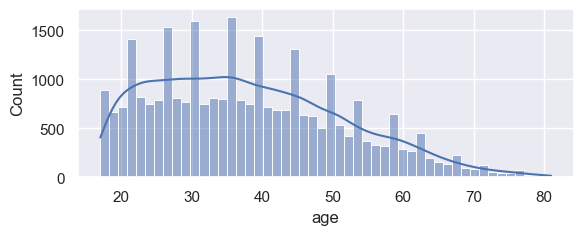

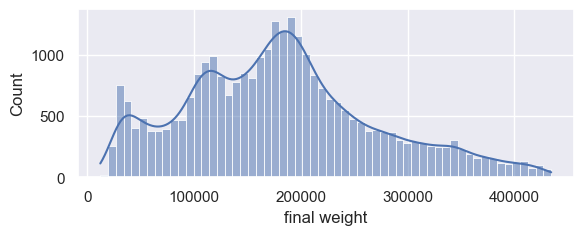

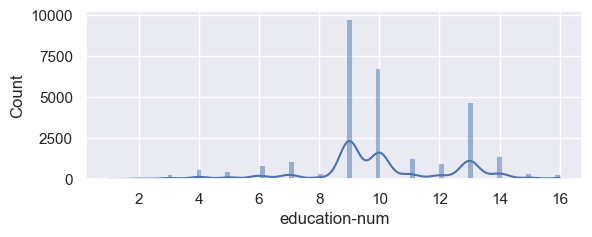

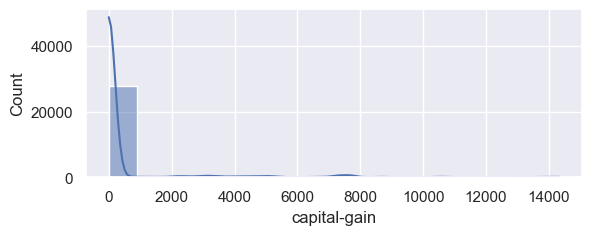

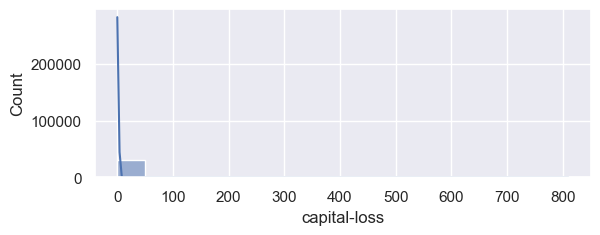

In [235]:
plot_data(columns,df1)  

## Applying Median Inter Quartile Range For Removing Outliers


The median interquartile range (IQR) is a statistical measure used to identify outliers by calculating the difference between the third quartile and first quartile of a dataset. This measure is used to identify extreme values that lie outside the normal range of the dataset. Outliers are values that are significantly higher or lower than the rest of the data and can be caused by measurement error, data entry errors, or other factors. The IQR is used to identify these outliers and then remove them from the dataset so that the results of any analysis are more accurate.

In [236]:
def find_median(data):
    indices = []
    sorted_list = sorted(data)
    list_size = len(data)
    median = 0

    if list_size % 2 == 0:
        indices.append(int(list_size / 2) - 1)  
        indices.append(int(list_size / 2))

        median = (data[indices[0]] + data[indices[1]]) / 2
        pass
    else:
        indices.append(int(list_size / 2))

        median = data[indices[0]]
        pass

    return median, indices

def get_quartile(samples):
    median, median_indices = find_median(samples)
    if(len(median_indices)==1):
        Q1, Q1_indices = find_median(samples[:median_indices[0]])
        Q3, Q3_indices = find_median(samples[median_indices[0]+1:])
    else:
        Q1, Q1_indices = find_median(samples[:median_indices[0]+1])
        Q3, Q3_indices = find_median(samples[median_indices[-1]:])
    quartiles = Q1,Q3,Q3-Q1
    print(Q3-Q1)
    return quartiles
    
def convertintoDict(dataset):
   
    Q1={}
    Q3={}
    for col in dataset:
        print(type(dataset[col]))
        q1,q3,iqr=get_quartile(dataset[col].tolist())
        Q1[col]=q1
        Q3[col]=q3
        
        
    Q1= pd.Series(Q1)
    Q3= pd.Series(Q3)
    
    return Q1,Q3

def remove_Outlier(dataset,cols):
    #Q1= df[['age','final weight','education-num','capital-gain','capital-loss']].quantile(0.25)
    #Q3= df[['age','final weight','education-num','capital-gain','capital-loss']].quantile(0.75)
    Q1,Q3 = convertintoDict(df[['age','final weight','education-num','capital-gain','capital-loss']])
    IQR=Q3-Q1
   
    condition = ~((dataset[cols] < (Q1 - (1.5 * IQR))) | (dataset[cols] > (Q3 + (1.5 * IQR)))).any(axis=1)
    filtered_data = dataset[condition]
    return filtered_data

/var/folders/k5/gm15b6qn58146slw1_3td6vr0000gn/T/ipykernel_60896/1903939284.py:55: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = ~((dataset[cols] < (Q1 - (1.5 * IQR))) | (dataset[cols] > (Q3 + (1.5 * IQR)))).any(axis=1)
/var/folders/k5/gm15b6qn58146slw1_3td6vr0000gn/T/ipykernel_60896/1903939284.py:55: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = ~((dataset[cols] < (Q1 - (1.5 * IQR))) | (dataset[cols] > (Q3 + (1.5 * IQR)))).any(axis=1)


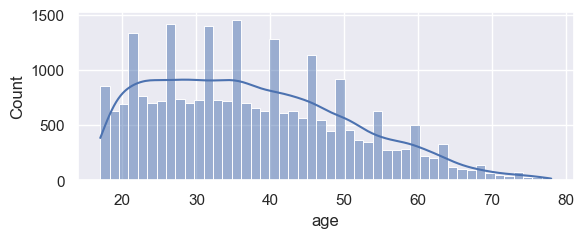

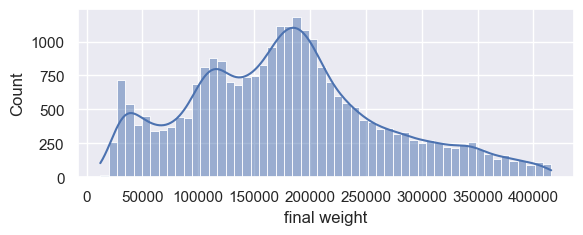

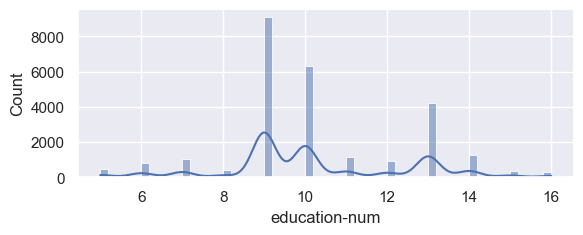

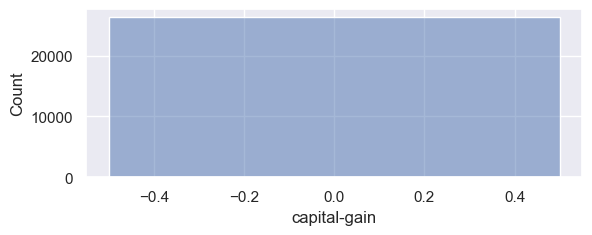

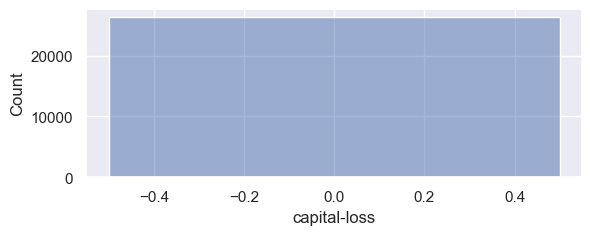

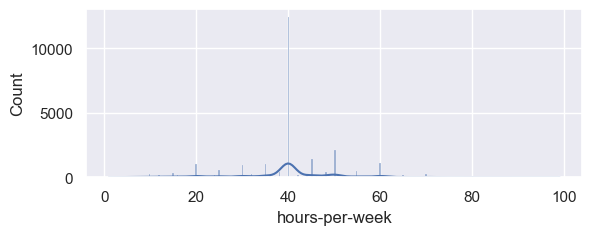

In [237]:
df2 = df.copy(deep=True)
columns=['age','final weight','education-num','capital-gain','capital-loss','hours-per-week']
df2=remove_Outlier(df2,columns)
plot_data(columns,df2)  

## Feature Selection & Feature Transformation

Below we will be apply encoding and applying manual transformation for converting ordianal features

In [238]:
class_map = {
    ' >50K': 1,
    ' <=50K': 2
    
}
df1['Income-Class'] = df['class'].map(class_map)

enc = OrdinalEncoder()
enc.fit(df[["workclass","marital-status", "race","sex","native-country","occupation"]])
df1[["workclass","marital-status", "race","sex","native-country","occupation"]] = enc.transform(df1[["workclass","marital-status", "race","sex","native-country","occupation"]])

Recursive feature elevation (Rfe) is being used in this instance to achieve feature selection and pursuit. RFE is a feature selection technique that fits a model and eliminates the weakest feature (or features) until the required number of features is reached. RFE aims to get rid of any dependencies and collinearity that may exist in the model by iteratively deleting a limited number of features every loop according to the model's coef_ or feature importances_ characteristics.

In [239]:
X = df1[['age','final weight','education-num','capital-gain','capital-loss','hours-per-week','workclass','marital-status','race','sex','native-country','occupation']]
y = df1['Income-Class']

model = LogisticRegression(max_iter=7000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X_train, y_train)


filter = selector.support_
ranking = selector.ranking_

features = array(['age','final weight','education-num','capital-gain','capital-loss','hours-per-week','workclass','marital-status','race','sex','native-country','occupation'])
print('Selected features:')
print(features[filter])

Selected features:
['age' 'education-num' 'capital-loss' 'hours-per-week' 'workclass'
 'marital-status' 'race' 'sex' 'native-country' 'occupation']


## Data visualization

Below pairplot are a good tool to see the connections between many factors. They enable you to easily see patterns, anomalies, and clusters in your data. They are very helpful for analysing exploratory data.

<Figure size 1500x700 with 0 Axes>

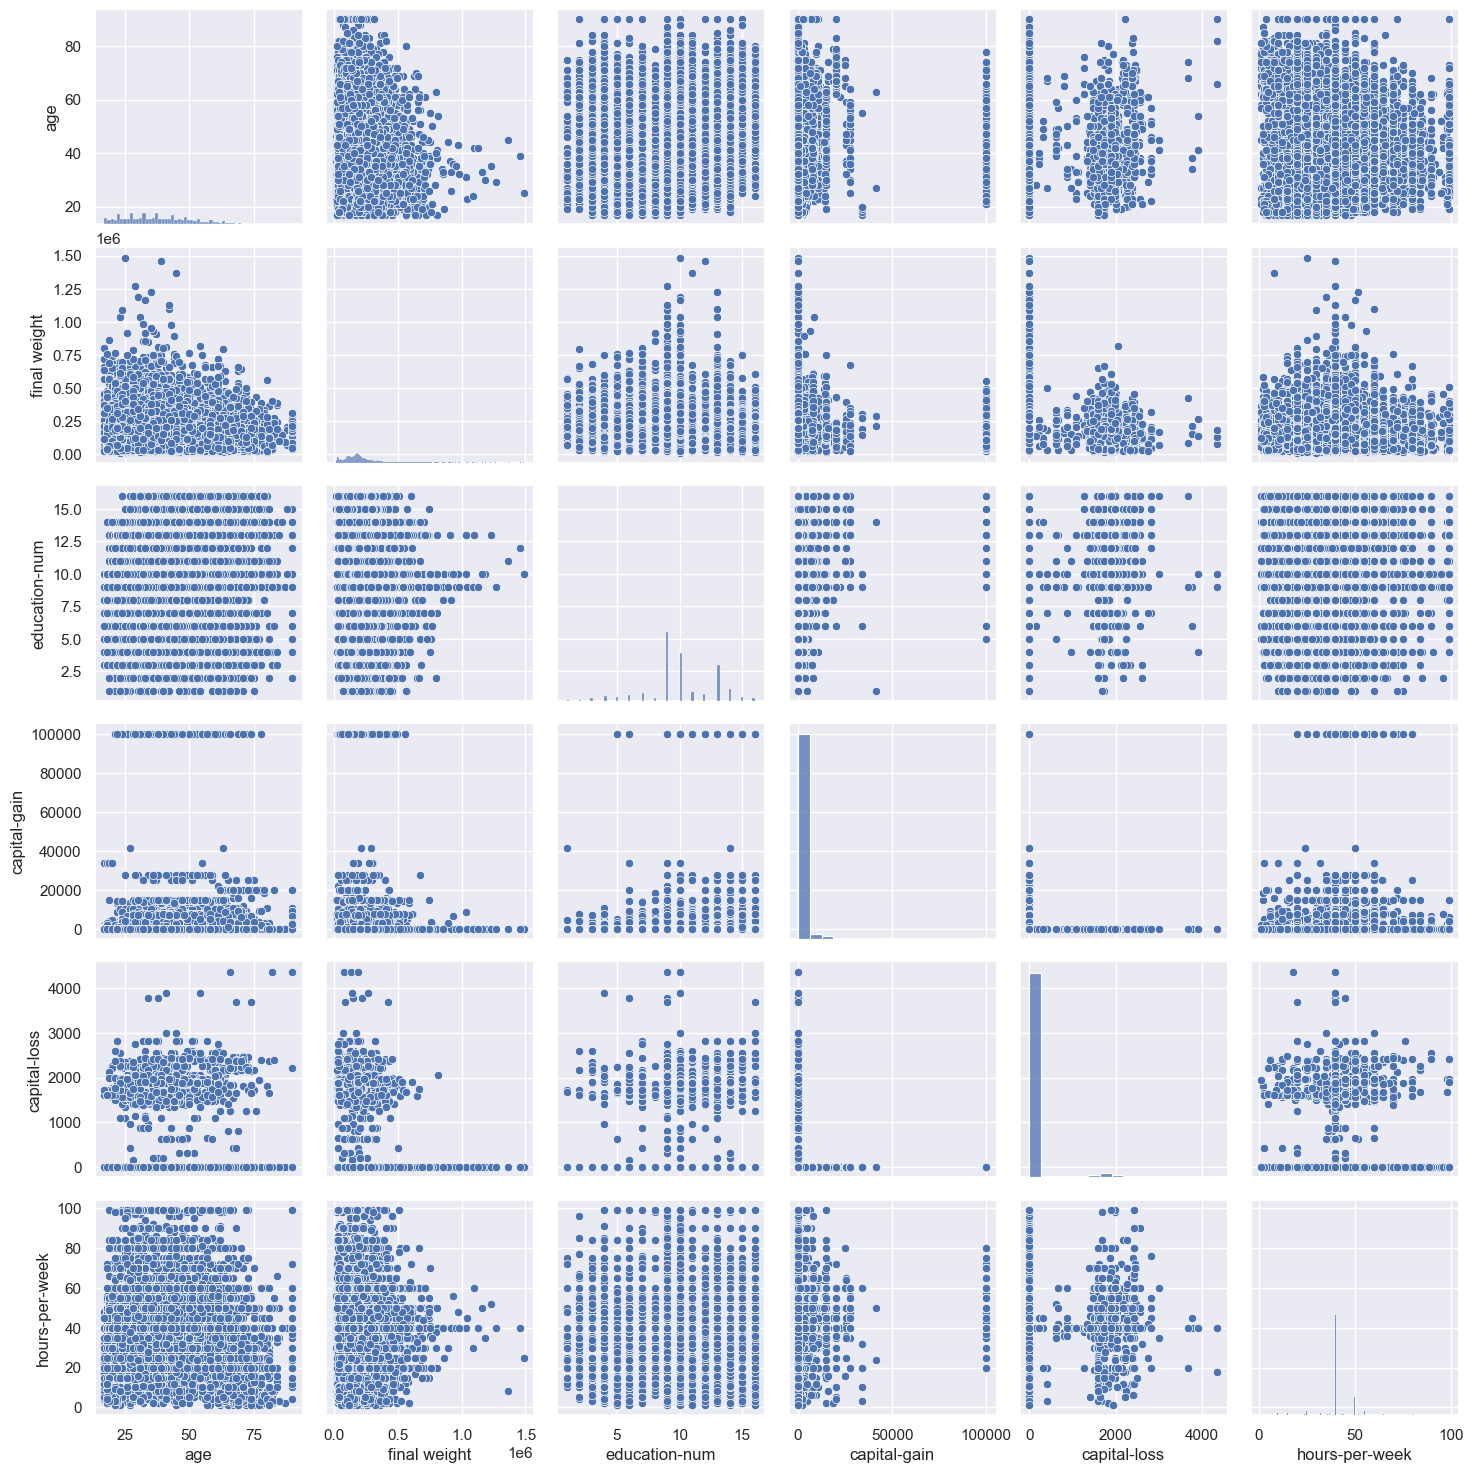

In [240]:
plt.figure(figsize=(15,7))
sns.pairplot(df)
plt.show()

Below are some barplot which repsesnts the relationship among features like age, income class, number of years spent in education, hours worked per week.

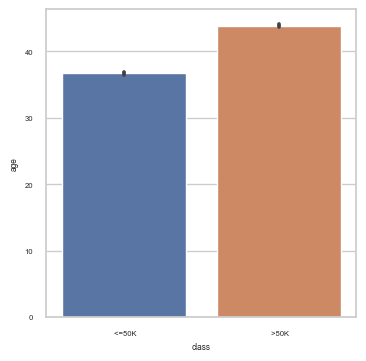

In [241]:
plt.figure(figsize=(4,4))
sns.set(style="whitegrid", font_scale=.5)
sns.barplot(x = "class", y = "age", data = df1)
plt.show()

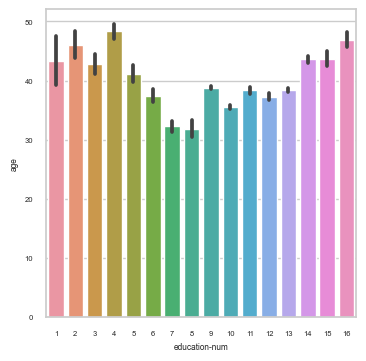

In [242]:
plt.figure(figsize=(4,4))
sns.set(style="whitegrid", font_scale=.5)

sns.barplot(x = "education-num", y = "age", data = df1)
plt.show()

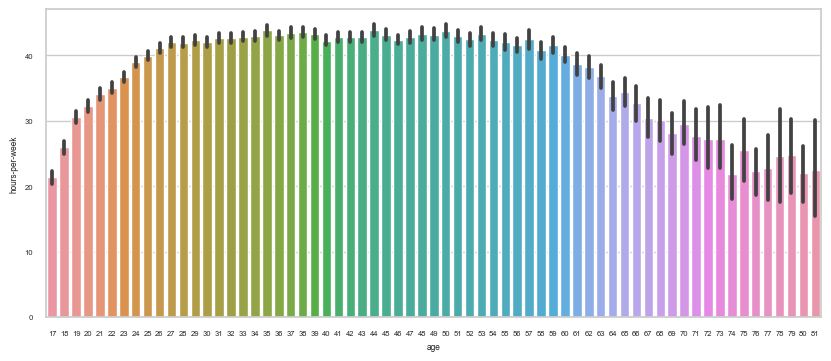

In [243]:
plt.figure(figsize=(10,4))
sns.set(style="whitegrid", font_scale=.5)

sns.barplot(x = "age", y = "hours-per-week", data = df1)
plt.show()

### Data Visualization Techniques - Measure of Central Tendency 

Central tendency is a measure of the center of a data set, which is used to summarize the data set. The three most common measures of central tendency are the mean, median, and mode. The mean is the average of all the values in the data set, the median is the middle value when the data is sorted, and the mode is the most common value in the data set. For the features indentified from feature selection technique , we will utilize them to plot each of the features and visualize the 3 different values.
In the below plots  mean is repsented using turquoise coloured line and median and mode, teal and yellow respectively.

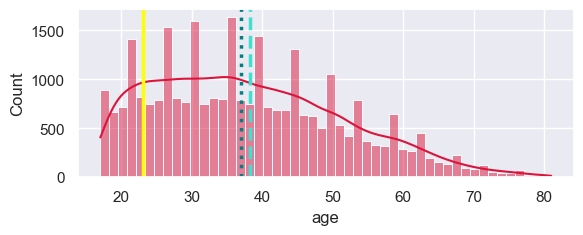

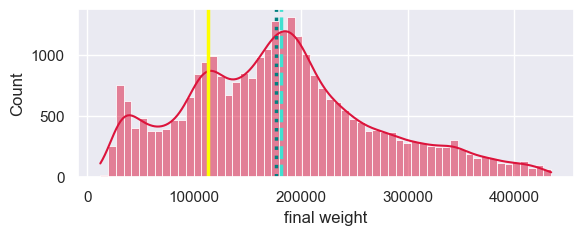

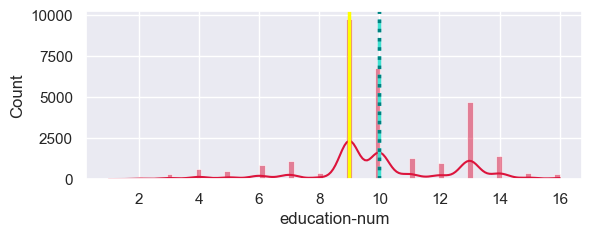

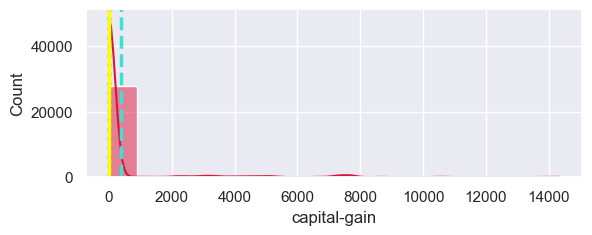

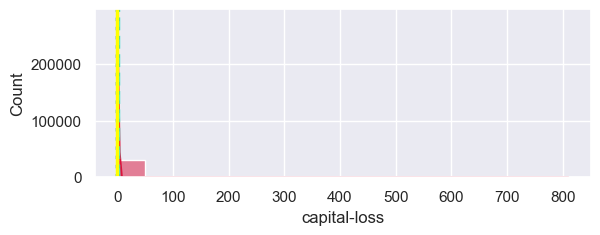

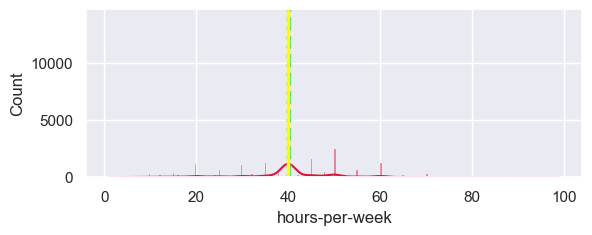

In [244]:
columns=['age','final weight','education-num','capital-gain','capital-loss','hours-per-week']
def plot_data(columns, dataframe):
    for col in columns:
        palette = sns.color_palette("bright")
        sns.set()
        plt.subplot(2,1,1)
        sns.histplot(data=dataframe, x=col, kde=True,alpha=0.5,color='crimson')
       
        plt.axvline(x=dataframe[col].mean(),
            color='turquoise',
            ls='--', 
            lw=2.5)
        plt.axvline(x=dataframe[col].median(),
            color='teal',
            ls=':', 
            lw=2.5)
        
        plt.axvline(x=dataframe[col].mode().values[0],
            color='yellow',
            ls='solid', 
            lw=2.5)
        
        plt.show()
        
plot_data(columns, df1)
        

### Data visualization techniques - Standard Deviation and IQR

BoxPlot can demonstrate IQR by showing the lower quartile Q!, median Q2, and upper quartile Q3 of a given data set. The lower quartile is the 25th percentile of the data set, the median is the 50th percentile, and the upper quartile is the 75th percentile. The Interquartile Range (IQR) is the difference between the upper quartile and lower quartile. BoxPlot is a great visual tool to quickly demonstrate IQR.Along with IQR we are showing Standar deviation value using the yellow line

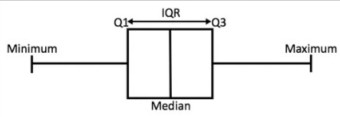

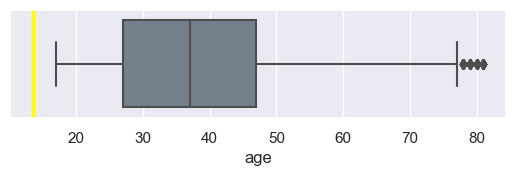

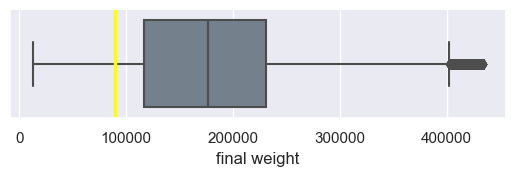

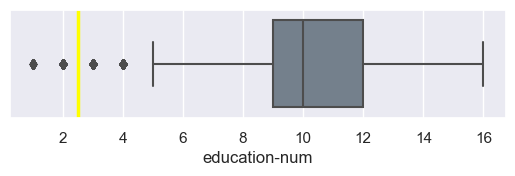

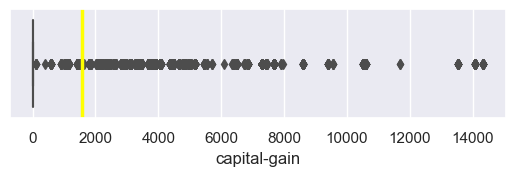

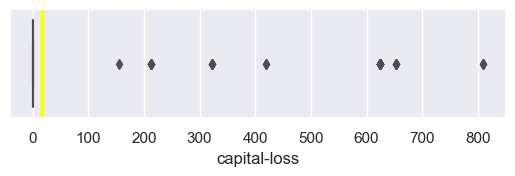

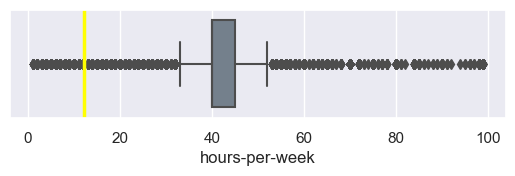

In [245]:
columns=['age','final weight','education-num','capital-gain','capital-loss','hours-per-week']
def plot_data(columns, dataframe):
    for col in columns:
        palette = sns.color_palette("bright")
        sns.set()
        plt.subplot(3,1,1)
        sns.boxplot(data=dataframe, x=col,color='slategrey')
        plt.axvline(x=dataframe[col].std(),
            color='yellow',
            ls='solid', 
            lw=2.5)
        plt.show()
        
plot_data(columns, df1)

## Random split of data


From the results of feature selection where we applied Recusive Feature Elimination we identified 10 best features and will be utilizing the same.For testing and modeling will be using 30% and 70% respectively.

In [246]:
X = df1[['age', 'education-num', 'capital-loss', 'hours-per-week', 'workclass','marital-status', 'race', 'sex', 'native-country', 'occupation']]
y = df1['Income-Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



## Applying Supervised Learning Model - Logistic Regression 

Logistic regression is used to model the relationship between a set of independent variables and a categorical dependent variable. It is used to predict the probability of an event occurring.Logistic regression can also be used to identify the factors that influence the probability of an event occurring.

In [247]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=7000)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## Performance Evalution

In [248]:
print("accuracy:", metrics.accuracy_score(y_test, y_pred))

accuracy: 0.8138985719104914


In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.30      0.41      1867
           2       0.84      0.95      0.89      7026

    accuracy                           0.81      8893
   macro avg       0.73      0.63      0.65      8893
weighted avg       0.79      0.81      0.79      8893



In [250]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 569 1298]
 [ 357 6669]]


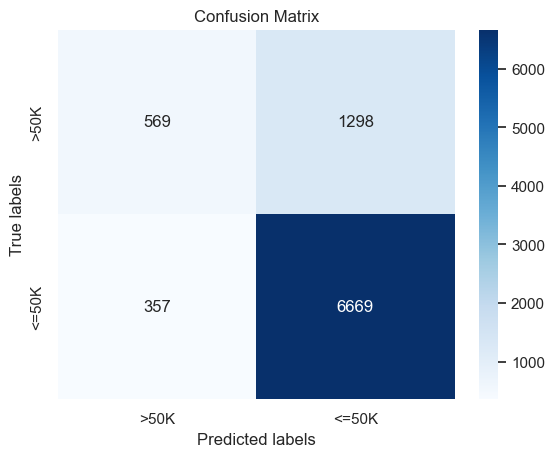

In [251]:
class_map = {
    ' >50K': 1,
    ' <=50K':2
    
}
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', cmap="Blues"); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['>50K', '<=50K']);
ax.yaxis.set_ticklabels(['>50K', '<=50K']);

We are considering classification report and Confusion Matrix as a metrics to evaluate the performance of the model. From this modelling we get an accuracy score of 81%, which is close to 100 also the precision values are 61% , 84% respectively for income class >50K & <=50K.The model predicted 569 values as True Positive and 6669 as True Negatives, the false postives and false negative lesser the perfomance can be improved by tuning the features.

## Applying Unsupervised Learning Model - Kmeans Clustering

K-means clustering is an unsupervised machine learning algorithm that groups data into clusters based on similar features. It is a type of partitioning clustering method, where data points are grouped into a pre-defined number of clusters. The goal is to partition the data points into k distinct clusters, where each data point belongs to a cluster within the nearest mean, serving as a prototype of the cluster. The algorithm works iteratively to assign each data point to one of k clusters based on the feature similarity. It then computes the centroid of each cluster. In the next iteration, the data points are reassigned to the cluster whose centroid is closest. This process is repeated until the clusters converge, i.e., the data points no longer change clusters.

In [252]:
# making a copy of dataset
df3 =  df1[['age','final weight','education-num','capital-gain','capital-loss','Income-Class']].copy(deep=True)
df3

columns=['age','final weight','education-num','capital-gain','capital-loss','Income-Class']
nsd = 2
for col in columns:
    mean = calculate_mean(df3[col])
    sd = calculate_stdv(df3[col])
    df3 = df3[df3[col] < mean + (nsd * sd)]
    
    
X = df3[['age','final weight','education-num','capital-gain','capital-loss','Income-Class']]
y = df3['Income-Class']

### Using Elbow Plot to determine the number of clusters 
 Elbow Plot is a technique used to help determine the optimal number of clusters for a given dataset.  It is used to determine the optimal number of cluster sizes for a given data set. Find the "elbow" in the plot, which is the point at which the SSE begins to decrease more slowly.

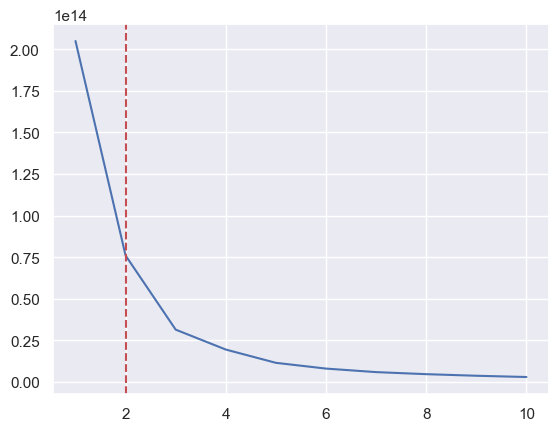

In [253]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df3)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);
plt.axvline(2, linestyle='--', color='r')

According to the elbow method we should have 3 clusters here.

### Using silhouette score to determine the number of clusters 

The silhouette score measures an object's cohesion with its own cluster in comparison with other clusters (separation). An object is better suited to its own cluster and there is a sharper differentiation between other clusters if the silhouette score is higher. Find the value of k that produces the highest silhouette score to identify the ideal number of clusters.

Silhouette Score cluster 2 = 0.5290
Silhouette Score cluster 3 = 0.5784
Silhouette Score cluster 4 = 0.5454
Silhouette Score cluster 5 = 0.5654
Silhouette Score cluster 6 = 0.5503
Silhouette Score cluster 7 = 0.5502
Silhouette Score cluster 8 = 0.5349
Silhouette Score cluster 9 = 0.5350
Silhouette Score cluster 10 = 0.5388

Best Silhouette score: 0.5784 - Number of cluster: 3


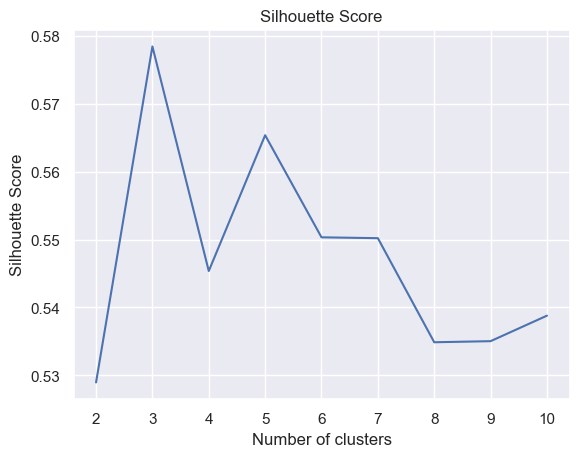

In [254]:
k = 10
max_score = { 
    'num_of_clusters': 0,
    'silhouette': 0
}
silhouette_scores = []

for i in range(2, k + 1):
    kmeans = KMeans(n_clusters=i, random_state=100).fit(df3)

    silhouette = silhouette_score(df3, kmeans.labels_) 
    silhouette_scores.append(silhouette)
    
    if silhouette >= max_score["silhouette"]:
        max_score["num_of_clusters"] = i
        max_score["silhouette"] = silhouette
    
    print(f"Silhouette Score cluster {i} = {silhouette:.4f}")
    
print(f"\nBest Silhouette score: {max_score['silhouette']:.4f} - Number of cluster: {max_score['num_of_clusters']}")

plt.plot(range(2, k + 1), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In the above we spilt the data in 10 cluster and determine best number of clusters based on highest Silhouette Score which is 3, So based on our findings we will apply k =3 for the modelling.

In [255]:
kmeans = KMeans(n_clusters = 3, random_state=100)
kmeans.fit(df3)

labels = kmeans.labels_

df3['labels']=labels

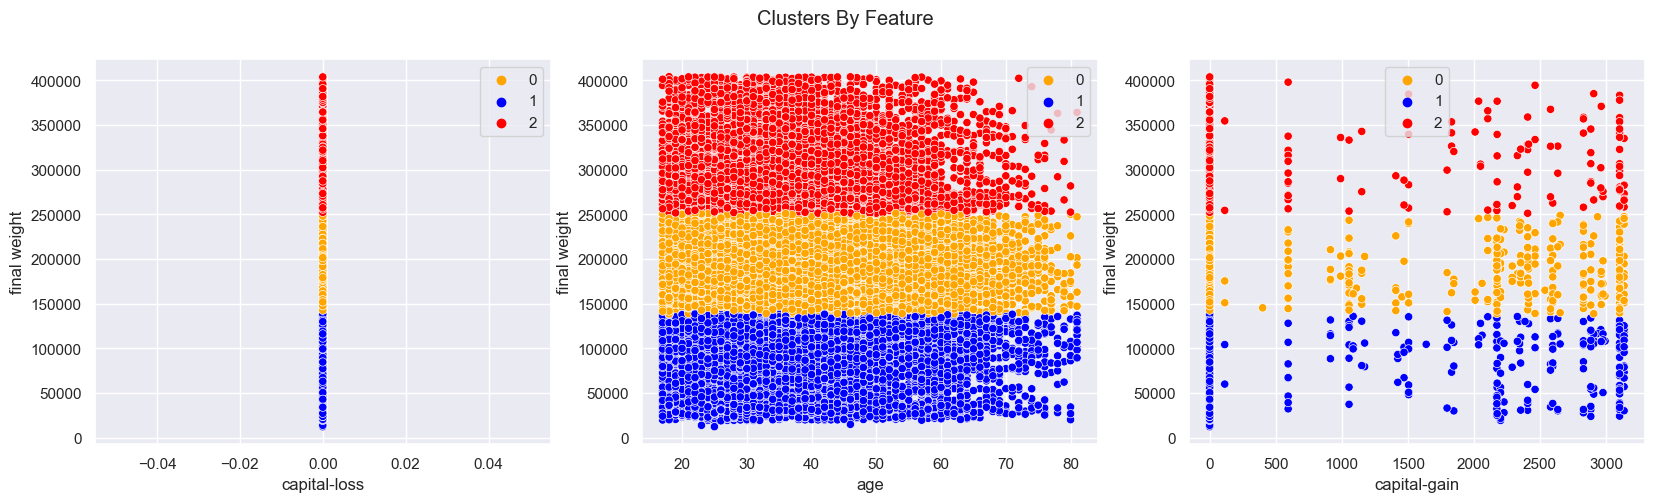

In [262]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (20, 5))
fig.suptitle(f"Clusters By Feature")

sns.scatterplot(x=X["capital-loss"], y=X["final weight"], hue=labels, palette=['orange', 'blue','red'], ax=ax1)
sns.scatterplot(x=X["age"], y=X["final weight"], hue=labels, palette=['orange', 'blue','red'], ax=ax2)
sns.scatterplot(x=X["capital-gain"], y=X["final weight"], hue=labels, palette=['orange', 'blue','red'], ax=ax3)

plt.show()

We attempted to determine the clusters using an unsupervised technique. The best number of clusters after training a K-Means model with various cluster counts were three, which precisely matches the number of categories the data had earlier, according to the Elbow Method and Silhouette score. Prior to training the model, these categories were eliminated and simply used for comparison.

## Conclusion
Following a step-by-step methodology, the data was initially preprocessed by being cleaning, missing value treatment, outlier detection, feature selection, and scaling.we looked at 2 different algorithms,Data clustering which is done with K-means, and classification was performed using logistic regression.
K-means groups data points depending on how similar they are, whereas logistic regression fits a logistic function to a set of data points to predict the likelihood of an outcome. While logistic regression is better for predictive modelling, K-means is better for exploratory data analysis.Though this we able to understand different techniques and metrics that are involved with each of these algorithm and was able get a fair understanding of how it works.
